In [1009]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.style.use('ggplot')

In [1010]:
Custmers = pd.read_excel("Ecommerce -Case Study.xlsx" , sheet_name = "Customers")
Categories = pd.read_excel("Ecommerce -Case Study.xlsx" , sheet_name = "Categories")
Employees = pd.read_excel("Ecommerce -Case Study.xlsx" , sheet_name = "Employees")
OrdersDetails = pd.read_excel("Ecommerce -Case Study.xlsx" , sheet_name = "OrdersDetails")
Orders = pd.read_excel("Ecommerce -Case Study.xlsx" , sheet_name = "Orders")
Product = pd.read_excel("Ecommerce -Case Study.xlsx" , sheet_name = "Product")
Suppliers = pd.read_excel("Ecommerce -Case Study.xlsx" , sheet_name = "Suppliers")
Shippers = pd.read_excel("Ecommerce -Case Study.xlsx" , sheet_name = "Shippers")


# Data Preprocessing

### Customers Table

In [1011]:
Custmers.head()

,CustomerID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
0,ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,Berlin,NaN,12209,Germany,030-0074321,030-0076545
1,ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Avda. de la Constitución 2222,México D.F.,NaN,05021,Mexico,(5) 555-4729,(5) 555-3745
2,ANTON,Antonio Moreno Taquería,Antonio Moreno,Owner,Mataderos 2312,México D.F.,NaN,05023,Mexico,(5) 555-3932,NaN
3,AROUT,Around the Horn,Thomas Hardy,Sales Representative,120 Hanover Sq.,London,NaN,WA1 1DP,UK,(171) 555-7788,(171) 555-6750
4,BERGS,Berglunds snabbköp,Christina Berglund,Order Administrator,Berguvsvägen 8,Luleå,NaN,S-958 22,Sweden,0921-12 34 65,0921-12 34 67


In [1012]:
Custmers.tail()

,CustomerID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
86,WARTH,Wartian Herkku,Pirkko Koskitalo,Accounting Manager,Torikatu 38,Oulu,NaN,90110,Finland,981-443655,981-443655
87,WELLI,Wellington Importadora,Paula Parente,Sales Manager,"Rua do Mercado, 12",Resende,SP,08737-363,Brazil,(14) 555-8122,NaN
88,WHITC,White Clover Markets,Karl Jablonski,Owner,305 - 14th Ave. S._x000D_\nSuite 3B,Seattle,WA,98128,USA,(206) 555-4112,(206) 555-4115
89,WILMK,Wilman Kala,Matti Karttunen,Owner/Marketing Assistant,Keskuskatu 45,Helsinki,NaN,21240,Finland,90-224 8858,90-224 8858
90,WOLZA,Wolski Zajazd,Zbyszek Piestrzeniewicz,Owner,ul. Filtrowa 68,Warszawa,NaN,01-012,Poland,(26) 642-7012,(26) 642-7012


In [1013]:
Custmers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    91 non-null     object
 1   CompanyName   91 non-null     object
 2   ContactName   91 non-null     object
 3   ContactTitle  91 non-null     object
 4   Address       91 non-null     object
 5   City          91 non-null     object
 6   Region        31 non-null     object
 7   PostalCode    90 non-null     object
 8   Country       91 non-null     object
 9   Phone         91 non-null     object
 10  Fax           69 non-null     object
dtypes: object(11)
memory usage: 7.9+ KB


In [1014]:
Custmers.describe()

,CustomerID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
count,91,91,91,91,91,91,31,90,91,91,69
unique,91,91,91,12,91,69,18,86,21,91,69
top,ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,London,SP,1010,USA,030-0074321,030-0076545
freq,1,1,1,17,1,6,6,3,13,1,1


In [1015]:
Custmers.isnull().sum()

CustomerID       0
CompanyName      0
ContactName      0
ContactTitle     0
Address          0
City             0
Region          60
PostalCode       1
Country          0
Phone            0
Fax             22
dtype: int64

In [1016]:
Custmers[Custmers['Region'].isnull()].shape

(60, 11)

In [1017]:
Custmers['Region'] = Custmers['Region'].fillna('Unknown').replace(['NaN', 'nan', 'NAN'], 'Unknown')

In [1018]:
Custmers[Custmers.Region.isnull()]

,CustomerID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax


In [1019]:
Custmers.isnull().sum()

CustomerID       0
CompanyName      0
ContactName      0
ContactTitle     0
Address          0
City             0
Region           0
PostalCode       1
Country          0
Phone            0
Fax             22
dtype: int64

In [1020]:
Custmers.drop(['PostalCode', 'Fax'], axis=1, inplace=True)

In [1021]:
Custmers.isnull().sum()

CustomerID      0
CompanyName     0
ContactName     0
ContactTitle    0
Address         0
City            0
Region          0
Country         0
Phone           0
dtype: int64

### Categories Table

In [1022]:
Categories.head()

,CategoryID,CategoryName,Description,Picture
0,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",NaN
1,2,Condiments,"Sweet and savory sauces, relishes, spreads, an...",NaN
2,3,Confections,"Desserts, candies, and sweet breads",NaN
3,4,Dairy Products,Cheeses,NaN
4,5,Grains/Cereals,"Breads, crackers, pasta, and cereal",NaN


In [1023]:
Categories.tail()

,CategoryID,CategoryName,Description,Picture
3,4,Dairy Products,Cheeses,NaN
4,5,Grains/Cereals,"Breads, crackers, pasta, and cereal",NaN
5,6,Meat/Poultry,Prepared meats,NaN
6,7,Produce,Dried fruit and bean curd,NaN
7,8,Seafood,Seaweed and fish,NaN


In [1024]:
Categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CategoryID    8 non-null      int64  
 1   CategoryName  8 non-null      object 
 2   Description   8 non-null      object 
 3   Picture       0 non-null      float64
dtypes: float64(1), int64(1), object(2)
memory usage: 388.0+ bytes


In [1025]:
Categories.describe()

,CategoryID,Picture
count,8.00000,0.0
mean,4.50000,NaN
std,2.44949,NaN
min,1.00000,NaN
25%,2.75000,NaN
50%,4.50000,NaN
75%,6.25000,NaN
max,8.00000,NaN


In [1026]:
Categories.isnull().sum()

CategoryID      0
CategoryName    0
Description     0
Picture         8
dtype: int64

In [1027]:
Categories.drop('Picture', axis=1, inplace=True)

In [1028]:
Categories.isnull().sum()

CategoryID      0
CategoryName    0
Description     0
dtype: int64

In [1029]:
Categories.duplicated().sum()

0

### Employees Table

In [1030]:
Employees.head()

,EmployeeID,LastName,FirstName,Title,TitleOfCourtesy,BirthDate,HireDate,Address,City,Region,PostalCode,Country,HomePhone,Extension,Photo,Notes,ReportsTo
0,1,Davolio,Nancy,Sales Representative,Ms.,1968-12-08,1992-05-01,507 - 20th Ave. E._x000D_\nApt. 2A,Seattle,WA,98122,USA,(206) 555-9857,5467,EmpID1.bmp,Education includes a BA in psychology from Col...,2.0
1,2,Fuller,Andrew,"Vice President, Sales",Dr.,1952-02-19,1992-08-14,908 W. Capital Way,Tacoma,WA,98401,USA,(206) 555-9482,3457,EmpID2.bmp,Andrew received his BTS commercial and a Ph.D....,NaN
2,3,Leverling,Janet,Sales Representative,Ms.,1963-08-30,1992-04-01,722 Moss Bay Blvd.,Kirkland,WA,98033,USA,(206) 555-3412,3355,EmpID3.bmp,Janet has a BS degree in chemistry from Boston...,2.0
3,4,Peacock,Margaret,Sales Representative,Mrs.,1958-09-19,1993-05-03,4110 Old Redmond Rd.,Redmond,WA,98052,USA,(206) 555-8122,5176,EmpID4.bmp,Margaret holds a BA in English literature from...,2.0
4,5,Buchanan,Steven,Sales Manager,Mr.,1955-03-04,1993-10-17,14 Garrett Hill,London,NaN,SW1 8JR,UK,(71) 555-4848,3453,EmpID5.bmp,Steven Buchanan graduated from St. Andrews Uni...,2.0


In [1031]:
Employees.tail()

,EmployeeID,LastName,FirstName,Title,TitleOfCourtesy,BirthDate,HireDate,Address,City,Region,PostalCode,Country,HomePhone,Extension,Photo,Notes,ReportsTo
4,5,Buchanan,Steven,Sales Manager,Mr.,1955-03-04,1993-10-17,14 Garrett Hill,London,NaN,SW1 8JR,UK,(71) 555-4848,3453,EmpID5.bmp,Steven Buchanan graduated from St. Andrews Uni...,2.0
5,6,Suyama,Michael,Sales Representative,Mr.,1963-07-02,1993-10-17,Coventry House_x000D_\nMiner Rd.,London,NaN,EC2 7JR,UK,(71) 555-7773,428,EmpID6.bmp,Michael is a graduate of Sussex University (MA...,5.0
6,7,King,Robert,Sales Representative,Mr.,1960-05-29,1994-01-02,Edgeham Hollow_x000D_\nWinchester Way,London,NaN,RG1 9SP,UK,(71) 555-5598,465,EmpID7.bmp,Robert King served in the Peace Corps and trav...,5.0
7,8,Callahan,Laura,Inside Sales Coordinator,Ms.,1958-01-09,1994-03-05,4726 - 11th Ave. N.E.,Seattle,WA,98105,USA,(206) 555-1189,2344,EmpID8.bmp,Laura received a BA in psychology from the Uni...,2.0
8,9,Dodsworth,Anne,Sales Representative,Ms.,1969-07-02,1994-11-15,7 Houndstooth Rd.,London,NaN,WG2 7LT,UK,(71) 555-4444,452,EmpID9.bmp,Anne has a BA degree in English from St. Lawre...,5.0


In [1032]:
Employees.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   EmployeeID       9 non-null      int64         
 1   LastName         9 non-null      object        
 2   FirstName        9 non-null      object        
 3   Title            9 non-null      object        
 4   TitleOfCourtesy  9 non-null      object        
 5   BirthDate        9 non-null      datetime64[ns]
 6   HireDate         9 non-null      datetime64[ns]
 7   Address          9 non-null      object        
 8   City             9 non-null      object        
 9   Region           5 non-null      object        
 10  PostalCode       9 non-null      object        
 11  Country          9 non-null      object        
 12  HomePhone        9 non-null      object        
 13  Extension        9 non-null      int64         
 14  Photo            9 non-null      object       

In [1033]:
Employees.describe()

,EmployeeID,BirthDate,HireDate,Extension,ReportsTo
count,9.000000,9,9,9.000000,8.000000
mean,5.000000,1961-02-11 18:40:00,1993-06-18 13:20:00,2733.000000,3.125000
min,1.000000,1952-02-19 00:00:00,1992-04-01 00:00:00,428.000000,2.000000
25%,3.000000,1958-01-09 00:00:00,1992-08-14 00:00:00,465.000000,2.000000
50%,5.000000,1960-05-29 00:00:00,1993-10-17 00:00:00,3355.000000,2.000000
75%,7.000000,1963-08-30 00:00:00,1994-01-02 00:00:00,3457.000000,5.000000
max,9.000000,1969-07-02 00:00:00,1994-11-15 00:00:00,5467.000000,5.000000
std,2.738613,NaN,NaN,1958.430366,1.552648


In [1034]:
Employees.isnull().sum()

EmployeeID         0
LastName           0
FirstName          0
Title              0
TitleOfCourtesy    0
BirthDate          0
HireDate           0
Address            0
City               0
Region             4
PostalCode         0
Country            0
HomePhone          0
Extension          0
Photo              0
Notes              0
ReportsTo          1
dtype: int64

In [1035]:
Employees.drop(['PostalCode','Photo','ReportsTo','Extension'] ,axis = 1 , inplace = True)

In [1036]:
Employees['Region'] = Employees['Region'].fillna('Unknown').replace(['Nan' , 'nan' , 'NAN'] , 'Unknown')

In [1037]:
Employees.head()

,EmployeeID,LastName,FirstName,Title,TitleOfCourtesy,BirthDate,HireDate,Address,City,Region,Country,HomePhone,Notes
0,1,Davolio,Nancy,Sales Representative,Ms.,1968-12-08,1992-05-01,507 - 20th Ave. E._x000D_\nApt. 2A,Seattle,WA,USA,(206) 555-9857,Education includes a BA in psychology from Col...
1,2,Fuller,Andrew,"Vice President, Sales",Dr.,1952-02-19,1992-08-14,908 W. Capital Way,Tacoma,WA,USA,(206) 555-9482,Andrew received his BTS commercial and a Ph.D....
2,3,Leverling,Janet,Sales Representative,Ms.,1963-08-30,1992-04-01,722 Moss Bay Blvd.,Kirkland,WA,USA,(206) 555-3412,Janet has a BS degree in chemistry from Boston...
3,4,Peacock,Margaret,Sales Representative,Mrs.,1958-09-19,1993-05-03,4110 Old Redmond Rd.,Redmond,WA,USA,(206) 555-8122,Margaret holds a BA in English literature from...
4,5,Buchanan,Steven,Sales Manager,Mr.,1955-03-04,1993-10-17,14 Garrett Hill,London,Unknown,UK,(71) 555-4848,Steven Buchanan graduated from St. Andrews Uni...


In [1038]:
Employees['Full Name'] = Employees['FirstName'] + ' ' + Employees['LastName']

In [1039]:
Employees.drop(['FirstName', 'LastName'], axis=1, inplace=True)

In [1040]:
Employees.head()

,EmployeeID,Title,TitleOfCourtesy,BirthDate,HireDate,Address,City,Region,Country,HomePhone,Notes,Full Name
0,1,Sales Representative,Ms.,1968-12-08,1992-05-01,507 - 20th Ave. E._x000D_\nApt. 2A,Seattle,WA,USA,(206) 555-9857,Education includes a BA in psychology from Col...,Nancy Davolio
1,2,"Vice President, Sales",Dr.,1952-02-19,1992-08-14,908 W. Capital Way,Tacoma,WA,USA,(206) 555-9482,Andrew received his BTS commercial and a Ph.D....,Andrew Fuller
2,3,Sales Representative,Ms.,1963-08-30,1992-04-01,722 Moss Bay Blvd.,Kirkland,WA,USA,(206) 555-3412,Janet has a BS degree in chemistry from Boston...,Janet Leverling
3,4,Sales Representative,Mrs.,1958-09-19,1993-05-03,4110 Old Redmond Rd.,Redmond,WA,USA,(206) 555-8122,Margaret holds a BA in English literature from...,Margaret Peacock
4,5,Sales Manager,Mr.,1955-03-04,1993-10-17,14 Garrett Hill,London,Unknown,UK,(71) 555-4848,Steven Buchanan graduated from St. Andrews Uni...,Steven Buchanan


### Orders Details Table

In [1041]:
OrdersDetails.head()

,OrderID,ProductID,UnitPrice,Quantity,Discount
0,10248,11,14.0,12,0.0
1,10248,42,9.8,10,0.0
2,10248,72,34.8,5,0.0
3,10249,14,18.6,9,0.0
4,10249,51,42.4,40,0.0


In [1042]:
OrdersDetails.tail()

,OrderID,ProductID,UnitPrice,Quantity,Discount
4304,11077,64,33.25,2,0.03
4305,11077,66,17.00,1,0.00
4306,11077,73,15.00,2,0.01
4307,11077,75,7.75,4,0.00
4308,11077,77,13.00,2,0.00


In [1043]:
OrdersDetails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4309 entries, 0 to 4308
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   OrderID    4309 non-null   int64  
 1   ProductID  4309 non-null   int64  
 2   UnitPrice  4309 non-null   float64
 3   Quantity   4309 non-null   int64  
 4   Discount   4309 non-null   float64
dtypes: float64(2), int64(3)
memory usage: 168.4 KB


In [1044]:
OrdersDetails.isnull().sum()

OrderID      0
ProductID    0
UnitPrice    0
Quantity     0
Discount     0
dtype: int64

In [1045]:
OrdersDetails.describe()

,OrderID,ProductID,UnitPrice,Quantity,Discount
count,4309.000000,4309.000000,4309.000000,4309.000000,4309.000000
mean,10659.471339,40.799954,26.221355,23.815735,0.056180
std,241.296628,22.154369,29.826837,19.021195,0.083446
min,10248.000000,1.000000,2.000000,1.000000,0.000000
25%,10451.000000,22.000000,12.000000,10.000000,0.000000
50%,10657.000000,41.000000,18.400000,20.000000,0.000000
75%,10863.000000,60.000000,32.000000,30.000000,0.100000
max,11077.000000,77.000000,263.500000,130.000000,0.250000


### Orders Table

In [1046]:
Orders.head()

,OrderID,Customer key,EmployeeID,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,...,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11
0,10248,WELLI,5,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10249,HILAA,6,1996-07-05,1996-08-16,1996-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10250,ERNSH,4,1996-07-08,1996-08-05,1996-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10251,CENTC,3,1996-07-08,1996-08-05,1996-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10252,OLDWO,4,1996-07-09,1996-08-06,1996-07-11,2,51.30,Suprêmes délices,"Boulevard Tirou, 255",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1047]:
Orders.tail()

,OrderID,Customer key,EmployeeID,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,...,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11
829,11077,RATTC,1,1998-05-06,1998-06-03,NaT,2,8.53,Rattlesnake Canyon Grocery,2817 Milton Dr.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
830,10251,CENTC,3,1996-07-08,1996-08-05,1996-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
831,10252,OLDWO,4,1996-07-09,1996-08-06,1996-07-11,2,51.30,Suprêmes délices,"Boulevard Tirou, 255",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
832,10253,QUEDE,3,1996-07-10,1996-07-24,1996-07-16,2,58.17,Hanari Carnes,"Rua do Paço, 67",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
833,10254,RATTC,5,1996-07-11,1996-08-08,1996-07-23,2,22.98,Chop-suey Chinese,Hauptstr. 31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1048]:
Orders.drop([])

,OrderID,Customer key,EmployeeID,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,...,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11
0,10248,WELLI,5,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10249,HILAA,6,1996-07-05,1996-08-16,1996-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10250,ERNSH,4,1996-07-08,1996-08-05,1996-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10251,CENTC,3,1996-07-08,1996-08-05,1996-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10252,OLDWO,4,1996-07-09,1996-08-06,1996-07-11,2,51.30,Suprêmes délices,"Boulevard Tirou, 255",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829,11077,RATTC,1,1998-05-06,1998-06-03,NaT,2,8.53,Rattlesnake Canyon Grocery,2817 Milton Dr.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
830,10251,CENTC,3,1996-07-08,1996-08-05,1996-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
831,10252,OLDWO,4,1996-07-09,1996-08-06,1996-07-11,2,51.30,Suprêmes délices,"Boulevard Tirou, 255",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
832,10253,QUEDE,3,1996-07-10,1996-07-24,1996-07-16,2,58.17,Hanari Carnes,"Rua do Paço, 67",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1049]:
Orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 834 entries, 0 to 833
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   OrderID         834 non-null    int64         
 1   Customer key    834 non-null    object        
 2   EmployeeID      834 non-null    int64         
 3   OrderDate       834 non-null    datetime64[ns]
 4   RequiredDate    834 non-null    datetime64[ns]
 5   ShippedDate     813 non-null    datetime64[ns]
 6   ShipVia         834 non-null    int64         
 7   Freight         834 non-null    float64       
 8   ShipName        834 non-null    object        
 9   ShipAddress     834 non-null    object        
 10  ShipCity        834 non-null    object        
 11  ShipRegion      324 non-null    object        
 12  ShipPostalCode  815 non-null    object        
 13  ShipCountry     834 non-null    object        
 14  Column1         0 non-null      float64       
 15  Column

In [1050]:
Orders.drop(['Column1','Column2','Column3','Column4','Column5','Column6','Column7','Column8','Column9','Column10','Column11','ShipPostalCode'], axis = 1 ,inplace = True)

In [1051]:
Orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 834 entries, 0 to 833
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   OrderID        834 non-null    int64         
 1   Customer key   834 non-null    object        
 2   EmployeeID     834 non-null    int64         
 3   OrderDate      834 non-null    datetime64[ns]
 4   RequiredDate   834 non-null    datetime64[ns]
 5   ShippedDate    813 non-null    datetime64[ns]
 6   ShipVia        834 non-null    int64         
 7   Freight        834 non-null    float64       
 8   ShipName       834 non-null    object        
 9   ShipAddress    834 non-null    object        
 10  ShipCity       834 non-null    object        
 11  ShipRegion     324 non-null    object        
 12  ShipCountry    834 non-null    object        
dtypes: datetime64[ns](3), float64(1), int64(3), object(6)
memory usage: 84.8+ KB


In [1052]:
Orders.isnull().sum()

OrderID            0
Customer key       0
EmployeeID         0
OrderDate          0
RequiredDate       0
ShippedDate       21
ShipVia            0
Freight            0
ShipName           0
ShipAddress        0
ShipCity           0
ShipRegion       510
ShipCountry        0
dtype: int64

In [1053]:
Orders[Orders.ShipRegion.isnull()]

,OrderID,Customer key,EmployeeID,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipCountry
0,10248,WELLI,5,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,NaN,France
1,10249,HILAA,6,1996-07-05,1996-08-16,1996-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,NaN,Germany
3,10251,CENTC,3,1996-07-08,1996-08-05,1996-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,NaN,France
4,10252,OLDWO,4,1996-07-09,1996-08-06,1996-07-11,2,51.30,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,NaN,Belgium
6,10254,RATTC,5,1996-07-11,1996-08-08,1996-07-23,2,22.98,Chop-suey Chinese,Hauptstr. 31,Bern,NaN,Switzerland
...,...,...,...,...,...,...,...,...,...,...,...,...,...
827,11075,RICSU,8,1998-05-06,1998-06-03,NaT,2,6.19,Richter Supermarkt,Starenweg 5,Genève,NaN,Switzerland
828,11076,BONAP,4,1998-05-06,1998-06-03,NaT,2,38.28,Bon app',"12, rue des Bouchers",Marseille,NaN,France
830,10251,CENTC,3,1996-07-08,1996-08-05,1996-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,NaN,France
831,10252,OLDWO,4,1996-07-09,1996-08-06,1996-07-11,2,51.30,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,NaN,Belgium


In [1054]:
Orders['ShipRegion'] = Orders['ShipRegion'].fillna('Unknown').replace(['Nan' , 'nan' , 'NAN'] , 'Unknown')

In [1055]:
Orders.isnull().sum()

OrderID           0
Customer key      0
EmployeeID        0
OrderDate         0
RequiredDate      0
ShippedDate      21
ShipVia           0
Freight           0
ShipName          0
ShipAddress       0
ShipCity          0
ShipRegion        0
ShipCountry       0
dtype: int64

In [1056]:
Orders['Year'] = Orders['OrderDate'].dt.year
Orders['Month'] = Orders['OrderDate'].dt.month  # Returns 1 (Jan) to 12 (Dec)
Orders['Day'] = Orders['OrderDate'].dt.day

# Extract month name (e.g., "January") from OrderDate (not from the numeric 'Month' column)
Orders['Month_Name'] = Orders['OrderDate'].dt.month_name()

### Product Table

In [1057]:
Product.head()

,ProductID,ProductName,SupplierID,CategoryID,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
0,1,Chai,1,1,10 boxes x 20 bags,18.00,39,0,10,False
1,2,Chang,1,1,24 - 12 oz bottles,19.00,17,40,25,False
2,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10.00,13,70,25,False
3,4,Chef Anton's Cajun Seasoning,2,2,48 - 6 oz jars,22.00,53,0,0,False
4,5,Chef Anton's Gumbo Mix,2,2,36 boxes,21.35,0,0,0,True


In [1058]:
Product.tail()

,ProductID,ProductName,SupplierID,CategoryID,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
72,73,Röd Kaviar,17,8,24 - 150 g jars,15.00,101,0,5,False
73,74,Longlife Tofu,4,7,5 kg pkg.,10.00,4,20,5,False
74,75,Rhönbräu Klosterbier,12,1,24 - 0.5 l bottles,7.75,125,0,25,False
75,76,Lakkalikööri,23,1,500 ml,18.00,57,0,20,False
76,77,Original Frankfurter grüne Soße,12,2,12 boxes,13.00,32,0,15,False


In [1059]:
Product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ProductID        77 non-null     int64  
 1   ProductName      77 non-null     object 
 2   SupplierID       77 non-null     int64  
 3   CategoryID       77 non-null     int64  
 4   QuantityPerUnit  77 non-null     object 
 5   UnitPrice        77 non-null     float64
 6   UnitsInStock     77 non-null     int64  
 7   UnitsOnOrder     77 non-null     int64  
 8   ReorderLevel     77 non-null     int64  
 9   Discontinued     77 non-null     bool   
dtypes: bool(1), float64(1), int64(6), object(2)
memory usage: 5.6+ KB


In [1060]:
Product.describe()

,ProductID,SupplierID,CategoryID,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,39.000000,13.649351,4.116883,28.866364,40.506494,10.129870,12.467532
std,22.371857,8.220267,2.395028,33.815111,36.147222,23.141072,10.931105
min,1.000000,1.000000,1.000000,2.500000,0.000000,0.000000,0.000000
25%,20.000000,7.000000,2.000000,13.250000,15.000000,0.000000,0.000000
50%,39.000000,13.000000,4.000000,19.500000,26.000000,0.000000,10.000000
75%,58.000000,20.000000,6.000000,33.250000,61.000000,0.000000,25.000000
max,77.000000,29.000000,8.000000,263.500000,125.000000,100.000000,30.000000


In [1061]:
Product.isnull().sum()

ProductID          0
ProductName        0
SupplierID         0
CategoryID         0
QuantityPerUnit    0
UnitPrice          0
UnitsInStock       0
UnitsOnOrder       0
ReorderLevel       0
Discontinued       0
dtype: int64

### Suppliers Table

In [1062]:
Suppliers.head()

,SupplierID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax,HomePage
0,1,Exotic Liquids,Charlotte Cooper,Purchasing Manager,49 Gilbert St.,London,NaN,EC1 4SD,UK,(171) 555-2222,NaN,NaN
1,2,New Orleans Cajun Delights,Shelley Burke,Order Administrator,P.O. Box 78934,New Orleans,LA,70117,USA,(100) 555-4822,NaN,NaN
2,3,Grandma Kelly's Homestead,Regina Murphy,Sales Representative,707 Oxford Rd.,Ann Arbor,MI,48104,USA,(313) 555-5735,(313) 555-3349,NaN
3,4,Tokyo Traders,Yoshi Nagase,Marketing Manager,9-8 Sekimai_x000D_\nMusashino-shi,Tokyo,NaN,100,Japan,(03) 3555-5011,NaN,NaN
4,5,Cooperativa de Quesos 'Las Cabras',Antonio del Valle Saavedra,Export Administrator,Calle del Rosal 4,Oviedo,Asturias,33007,Spain,(98) 598 76 54,NaN,NaN


In [1063]:
Suppliers.tail()

,SupplierID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax,HomePage
24,25,Ma Maison,Jean-Guy Lauzon,Marketing Manager,2960 Rue St. Laurent,Montréal,Québec,H1J 1C3,Canada,(514) 555-9022,NaN,NaN
25,26,Pasta Buttini s.r.l.,Giovanni Giudici,Order Administrator,"Via dei Gelsomini, 153",Salerno,NaN,84100,Italy,(089) 6547665,(089) 6547667,NaN
26,27,Escargots Nouveaux,Marie Delamare,Sales Manager,"22, rue H. Voiron",Montceau,NaN,71300,France,85.57.00.07,NaN,NaN
27,28,Gai pâturage,Eliane Noz,Sales Representative,"Bat. B_x000D_\n3, rue des Alpes",Annecy,NaN,74000,France,38.76.98.06,38.76.98.58,NaN
28,29,Forêts d'érables,Chantal Goulet,Accounting Manager,148 rue Chasseur,Ste-Hyacinthe,Québec,J2S 7S8,Canada,(514) 555-2955,(514) 555-2921,NaN


In [1064]:
Suppliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   SupplierID    29 non-null     int64 
 1   CompanyName   29 non-null     object
 2   ContactName   29 non-null     object
 3   ContactTitle  29 non-null     object
 4   Address       29 non-null     object
 5   City          29 non-null     object
 6   Region        9 non-null      object
 7   PostalCode    29 non-null     object
 8   Country       29 non-null     object
 9   Phone         29 non-null     object
 10  Fax           13 non-null     object
 11  HomePage      3 non-null      object
dtypes: int64(1), object(11)
memory usage: 2.8+ KB


In [1065]:
Suppliers.drop(['Fax','HomePage','PostalCode','Phone'], axis=1, inplace=True)

In [1066]:
Suppliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   SupplierID    29 non-null     int64 
 1   CompanyName   29 non-null     object
 2   ContactName   29 non-null     object
 3   ContactTitle  29 non-null     object
 4   Address       29 non-null     object
 5   City          29 non-null     object
 6   Region        9 non-null      object
 7   Country       29 non-null     object
dtypes: int64(1), object(7)
memory usage: 1.9+ KB


In [1067]:
Suppliers['Region'] = Suppliers['Region'].fillna('Unkown').replace(['NaN', 'nan', 'NAN'], 'Unknown')

In [1068]:
Suppliers.isnull().sum()

SupplierID      0
CompanyName     0
ContactName     0
ContactTitle    0
Address         0
City            0
Region          0
Country         0
dtype: int64

### Shippers Table

In [1069]:
Shippers.head()

,ShipperID,CompanyName,Phone
0,1,Speedy Express,(503) 555-9831
1,2,United Package,(503) 555-3199
2,3,Federal Shipping,(503) 555-9931


In [1070]:
Shippers.tail()

,ShipperID,CompanyName,Phone
0,1,Speedy Express,(503) 555-9831
1,2,United Package,(503) 555-3199
2,3,Federal Shipping,(503) 555-9931


In [1071]:
Shippers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ShipperID    3 non-null      int64 
 1   CompanyName  3 non-null      object
 2   Phone        3 non-null      object
dtypes: int64(1), object(2)
memory usage: 204.0+ bytes


### Merge Table

In [1072]:
Orders = pd.merge(Orders, OrdersDetails, on='OrderID', how='left')

In [1073]:
Orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4333 entries, 0 to 4332
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   OrderID        4333 non-null   int64         
 1   Customer key   4333 non-null   object        
 2   EmployeeID     4333 non-null   int64         
 3   OrderDate      4333 non-null   datetime64[ns]
 4   RequiredDate   4333 non-null   datetime64[ns]
 5   ShippedDate    4187 non-null   datetime64[ns]
 6   ShipVia        4333 non-null   int64         
 7   Freight        4333 non-null   float64       
 8   ShipName       4333 non-null   object        
 9   ShipAddress    4333 non-null   object        
 10  ShipCity       4333 non-null   object        
 11  ShipRegion     4333 non-null   object        
 12  ShipCountry    4333 non-null   object        
 13  Year           4333 non-null   int32         
 14  Month          4333 non-null   int32         
 15  Day            4333 n

In [1074]:
Orders.duplicated().sum()

2178

In [1075]:
Orders.drop_duplicates(inplace=True)

In [1076]:
Orders['TotalPrice'] = (Orders['UnitPrice'] * Orders['Quantity']) * (1 - Orders['Discount']).astype(float)

In [1077]:
Orders['TotalPrice']

0        168.000
1         98.000
2        174.000
5        167.400
6       1696.000
          ...   
4279      64.505
4280      17.000
4281      29.700
4282      31.000
4283      26.000
Name: TotalPrice, Length: 2155, dtype: float64

In [1078]:
Orders = pd.merge(Orders , Product , on = 'ProductID' , how = 'left')
Orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   OrderID          2155 non-null   int64         
 1   Customer key     2155 non-null   object        
 2   EmployeeID       2155 non-null   int64         
 3   OrderDate        2155 non-null   datetime64[ns]
 4   RequiredDate     2155 non-null   datetime64[ns]
 5   ShippedDate      2082 non-null   datetime64[ns]
 6   ShipVia          2155 non-null   int64         
 7   Freight          2155 non-null   float64       
 8   ShipName         2155 non-null   object        
 9   ShipAddress      2155 non-null   object        
 10  ShipCity         2155 non-null   object        
 11  ShipRegion       2155 non-null   object        
 12  ShipCountry      2155 non-null   object        
 13  Year             2155 non-null   int32         
 14  Month            2155 non-null   int32  

In [1079]:
Orders.groupby('ProductName')['TotalPrice'].sum().sort_values(ascending = False).head(10)

ProductName
Côte de Blaye              141396.734903
Thüringer Rostbratwurst     80368.671975
Raclette Courdavault        71155.699909
Tarte au sucre              47234.969954
Camembert Pierrot           46825.479953
Gnocchi di nonna Alice      42593.059961
Manjimup Dried Apples       41819.649954
Alice Mutton                32698.379981
Carnarvon Tigers            29171.874963
Rössle Sauerkraut           25696.639981
Name: TotalPrice, dtype: float64

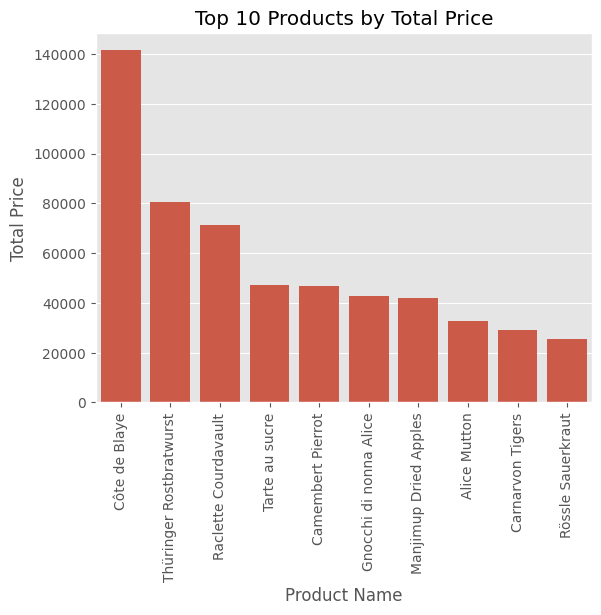

In [1080]:
sns.barplot(x = Orders.groupby('ProductName')['TotalPrice'].sum().sort_values(ascending = False).head(10).index , y = Orders.groupby('ProductName')['TotalPrice'].sum().sort_values(ascending = False).head(10).values)
plt.xticks(rotation = 90)
plt.title('Top 10 Products by Total Price')
plt.xlabel('Product Name')
plt.ylabel('Total Price')
plt.show()

In [1138]:
fig = px.bar(x = Orders.groupby('ProductName')['OrderID'].nunique().sort_values(ascending = False).head(10).index ,
                y = Orders.groupby('ProductName')['OrderID'].nunique().sort_values(ascending = False).head(10).values)
fig.update_layout(title_text='Top 10 Products by Order Count',
                  xaxis_title_text='Product Name',
                  yaxis_title_text='Order Count')
fig.show()

In [1132]:
Orders.groupby('ProductName')['OrderID'].nunique().sort_values(ascending = False).head(10)

ProductName
Raclette Courdavault               54
Gorgonzola Telino                  51
Guaraná Fantástica                 51
Camembert Pierrot                  51
Gnocchi di nonna Alice             50
Tarte au sucre                     48
Jack's New England Clam Chowder    47
Rhönbräu Klosterbier               46
Chang                              44
Pavlova                            43
Name: OrderID, dtype: int64

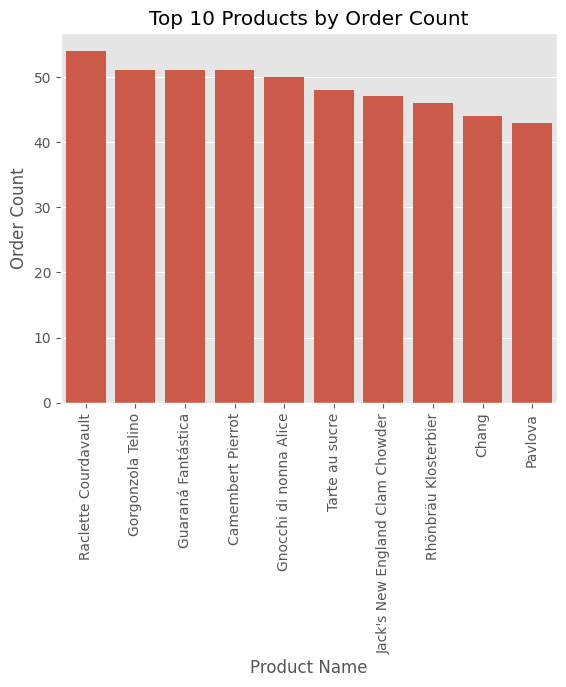

In [1135]:
sns.barplot(x = Orders.groupby('ProductName')['OrderID'].nunique().sort_values(ascending = False).head(10).index ,
            y = Orders.groupby('ProductName')['OrderID'].nunique().sort_values(ascending = False).head(10).values)
plt.xticks(rotation = 90)
plt.title('Top 10 Products by Order Count')
plt.xlabel('Product Name')
plt.ylabel('Order Count')
plt.show()

In [1137]:
fig = px.bar(x = Orders.groupby('ProductName')['OrderID'].nunique().sort_values(ascending = False).head(10).index ,
             y = Orders.groupby('ProductName')['OrderID'].nunique().sort_values(ascending = False).head(10).values)
fig.update_layout(
    xaxis_title='Region Name',
    yaxis_title='Total Orders',
    title_text='Top 10 Region by Total Orders',
    title_x=0.5,
    title_y=0.95,
    title_font=dict(size=20),
    xaxis_tickangle=-45
)
fig.show()

In [1081]:
Orders.groupby('ShipRegion')['TotalPrice'].sum().sort_values(ascending = False)[1:11]

ShipRegion
ID          104361.949868
SP           54968.796444
RJ           51956.979964
NM           51097.800488
Co. Cork     49979.904946
WA           29291.804972
OR           29190.249977
Québec       28872.189950
Táchira      22768.763986
BC           21324.099996
Name: TotalPrice, dtype: float64

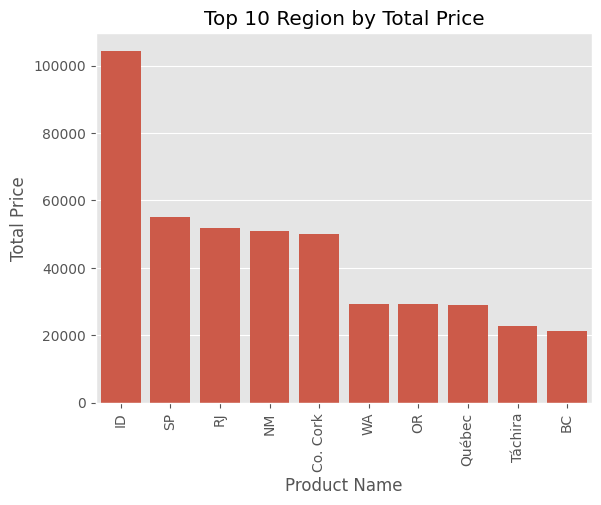

In [1082]:
sns.barplot(x = Orders.groupby('ShipRegion')['TotalPrice'].sum().sort_values(ascending = False)[1:11].index , y = Orders.groupby('ShipRegion')['TotalPrice'].sum().sort_values(ascending = False)[1:11].values)
plt.xticks(rotation = 90)
plt.title('Top 10 Region by Total Price')
plt.xlabel('Product Name')
plt.ylabel('Total Price')
plt.show()

In [1083]:
fig = px.bar(x = Orders.groupby('ShipRegion')['TotalPrice'].sum().sort_values(ascending = False)[1:11].index , y = Orders.groupby('ShipRegion')['TotalPrice'].sum().sort_values(ascending = False)[1:11].values)
fig.update_layout(
    xaxis_title='Product Name',
    yaxis_title='Total Price',
    title_text='Top 10 Region by Total Price',
    title_x=0.5,
    title_y=0.95,
    title_font=dict(size=20),
    xaxis_tickangle=-45
)


fig.show()

In [1139]:
Orders.groupby('ShipRegion')['OrderID'].nunique().sort_values(ascending = False)

ShipRegion
Unknown          507
SP                49
RJ                34
ID                31
OR                28
WA                19
Co. Cork          19
NM                18
Táchira           18
BC                17
Lara              14
Essex             13
Québec            13
Nueva Esparta     12
AK                10
Isle of Wight     10
WY                 9
CA                 4
MT                 3
DF                 2
Name: OrderID, dtype: int64

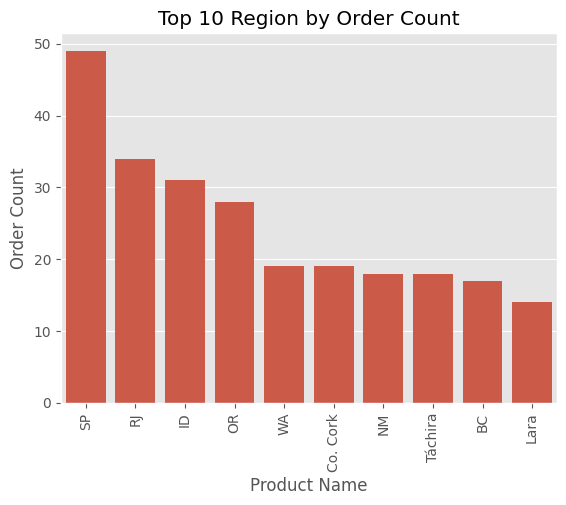

In [1141]:
sns.barplot(x = Orders.groupby('ShipRegion')['OrderID'].nunique().sort_values(ascending = False)[1:11].index , 
            y = Orders.groupby('ShipRegion')['OrderID'].nunique().sort_values(ascending = False)[1:11].values)

plt.xticks(rotation = 90)
plt.title('Top 10 Region by Order Count')
plt.xlabel('Product Name')
plt.ylabel('Order Count')
plt.show()

In [1142]:
fig = px.bar(x = Orders.groupby('ShipRegion')['OrderID'].nunique().sort_values(ascending = False)[1:11].index ,
             y = Orders.groupby('ShipRegion')['OrderID'].nunique().sort_values(ascending = False)[1:11].values)

fig.update_layout(
    xaxis_title='Region Name',
    yaxis_title='Total Orders',
    title_text='Top 10 Region by Total Orders',
    title_x=0.5,
    title_y=0.95,
    title_font=dict(size=20),
)

fig.show()

In [1084]:
monthly = Orders.groupby('Month_Name')['TotalPrice'].sum().reset_index()
monthly

,Month_Name,TotalPrice
0,April,176831.634848
1,August,72772.944935
2,December,116638.058412
3,February,137898.922399
4,January,155480.180313
5,July,78882.752409
6,June,36362.802448
7,March,143401.374908
8,May,72114.920393
9,November,89133.853910


In [1085]:
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

monthly['Month'] = pd.Categorical(
    monthly['Month_Name'],
    categories=month_order,
    ordered=True
)

df_sorted = monthly.sort_values('Month')

# النتيجة
print(df_sorted)

   Month_Name     TotalPrice      Month
4     January  155480.180313    January
3    February  137898.922399   February
7       March  143401.374908      March
0       April  176831.634848      April
8         May   72114.920393        May
6        June   36362.802448       June
5        July   78882.752409       July
1      August   72772.944935     August
11  September   82010.642445  September
10    October  104264.950866    October
9    November   89133.853910   November
2    December  116638.058412   December


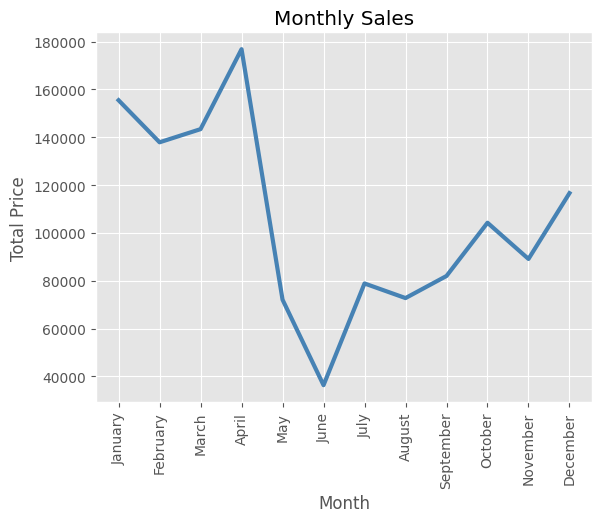

In [1086]:
sns.lineplot(x = df_sorted['Month_Name'], y = df_sorted['TotalPrice'] , markers='*', markersize=12,          
    markeredgecolor='black',  
    markerfacecolor='gold',   
    linewidth= 3,             
    color='steelblue')
plt.xticks(rotation = 90)
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Price')
plt.show()

In [1087]:
fig = px.line(x = df_sorted['Month_Name'], y = df_sorted['TotalPrice'])

fig.update_layout(
    xaxis_title='Month ',
    yaxis_title='Total Price',
    title_text='Month by Total Price',
    title_x=0.5,
    title_y=0.95,
    title_font=dict(size=20),
    xaxis_tickangle=-45
)

fig.show()

In [1088]:
Order_sort = Orders.groupby('Month_Name')['OrderID'].count().reset_index()

In [1089]:
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

Order_sort['Month'] = pd.Categorical(
    Order_sort['Month_Name'],
    categories=month_order,
    ordered=True
)

df_sorted = Order_sort.sort_values('Month')

# النتيجة
print(df_sorted)

   Month_Name  OrderID      Month
4     January      237    January
3    February      201   February
7       March      255      March
0       April      261      April
8         May      155        May
6        June       76       June
5        July      136       July
1      August      153     August
11  September      152  September
10    October      179    October
9    November      155   November
2    December      195   December


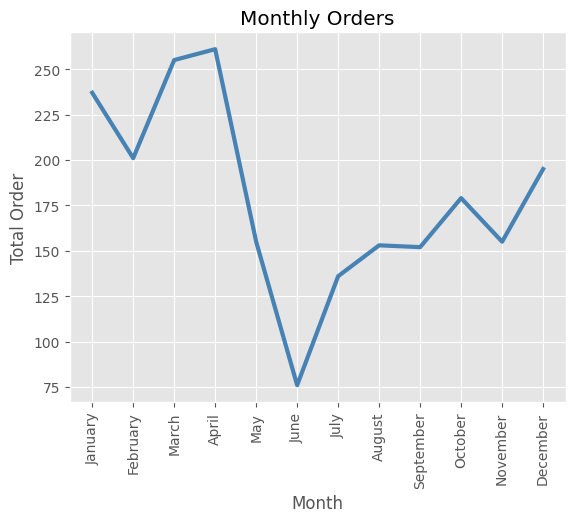

In [1090]:
sns.lineplot(x = df_sorted['Month_Name'], y = df_sorted['OrderID'] , markers='*', markersize=12,          
    markeredgecolor='black',  
    markerfacecolor='gold',   
    linewidth= 3,             
    color='steelblue')
plt.xticks(rotation = 90)
plt.title('Monthly Orders')
plt.xlabel('Month')
plt.ylabel('Total Order')
plt.show()

In [1091]:
fig = px.line(x = df_sorted['Month_Name'], y = df_sorted['OrderID'])

fig.update_layout(
    xaxis_title='Month',
    yaxis_title='Total Orders',
    title_text='Month by Total Orders',
    title_x=0.5,
    title_y=0.95,
    title_font=dict(size=20),
    xaxis_tickangle=-45
)

fig.show()


In [1092]:
yearly_sales = Orders.groupby('Year')['TotalPrice'].sum()
yearly_sales

Year
1996    208083.969755
1997    617085.202870
1998    440623.865663
Name: TotalPrice, dtype: float64

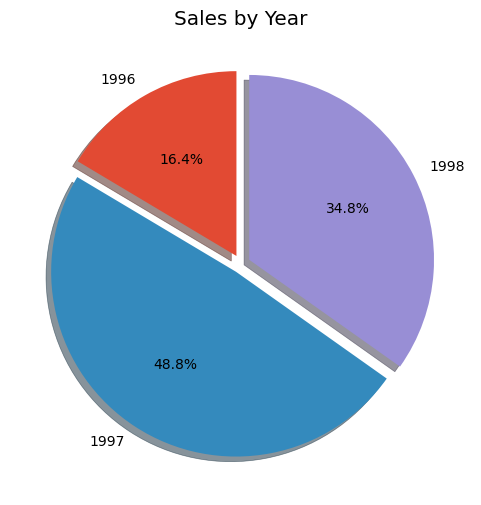

In [1093]:
yearly_sales = Orders.groupby('Year')['TotalPrice'].sum()

# رسم الدائرة
plt.figure(figsize=(6, 6))
plt.pie(
    yearly_sales,
    labels=yearly_sales.index,
    autopct='%1.1f%%',
    startangle=90,
    shadow=True,  # هنا أضفنا الشادو
    explode=[0.05]*len(yearly_sales)  # ممكن كمان تعمل انفصال بسيط بين الشرائح
)
plt.title('Sales by Year')
plt.show()

In [1094]:
fig = px.pie(values=yearly_sales, names=yearly_sales.index)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(
    title_text='Sales by Year',
    title_x=0.5,
    title_y=0.95,
    title_font=dict(size=20)
)
fig.show()

In [1095]:
yearly_Order = Orders.groupby('Year')['OrderID'].nunique()
yearly_Order


Year
1996    152
1997    408
1998    270
Name: OrderID, dtype: int64

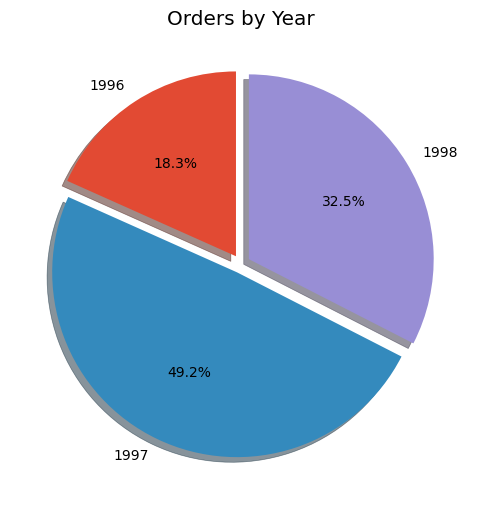

In [1096]:
plt.figure(figsize=(6, 6))
plt.pie(
    yearly_Order,
    labels=yearly_Order.index,
    autopct='%1.1f%%',
    startangle=90,
    shadow=True,  
    explode=[0.05]*len(yearly_Order)  
)
plt.title('Orders by Year')
plt.show()

In [1097]:
fig = px.pie(values=yearly_Order, names=yearly_Order.index)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(
    title_text='Orders by Year',
    title_x=0.5,
    title_y=0.95,
    title_font=dict(size=20)
)
fig.show()

In [1098]:
merge_df = Product.merge(Categories, on='CategoryID', how='left')

In [1099]:
merge_df.head()

,ProductID,ProductName,SupplierID,CategoryID,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued,CategoryName,Description
0,1,Chai,1,1,10 boxes x 20 bags,18.00,39,0,10,False,Beverages,"Soft drinks, coffees, teas, beers, and ales"
1,2,Chang,1,1,24 - 12 oz bottles,19.00,17,40,25,False,Beverages,"Soft drinks, coffees, teas, beers, and ales"
2,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10.00,13,70,25,False,Condiments,"Sweet and savory sauces, relishes, spreads, an..."
3,4,Chef Anton's Cajun Seasoning,2,2,48 - 6 oz jars,22.00,53,0,0,False,Condiments,"Sweet and savory sauces, relishes, spreads, an..."
4,5,Chef Anton's Gumbo Mix,2,2,36 boxes,21.35,0,0,0,True,Condiments,"Sweet and savory sauces, relishes, spreads, an..."


In [1100]:
merge_df = merge_df.merge(Orders, on='ProductID', how='left')

In [1101]:
merge_df.head()

,ProductID,ProductName_x,SupplierID_x,CategoryID_x,QuantityPerUnit_x,UnitPrice,UnitsInStock_x,UnitsOnOrder_x,ReorderLevel_x,Discontinued_x,...,TotalPrice,ProductName_y,SupplierID_y,CategoryID_y,QuantityPerUnit_y,UnitPrice_y,UnitsInStock_y,UnitsOnOrder_y,ReorderLevel_y,Discontinued_y
0,1,Chai,1,1,10 boxes x 20 bags,18.0,39,0,10,False,...,518.399998,Chai,1,1,10 boxes x 20 bags,18.0,39,0,10,False
1,1,Chai,1,1,10 boxes x 20 bags,18.0,39,0,10,False,...,259.200000,Chai,1,1,10 boxes x 20 bags,18.0,39,0,10,False
2,1,Chai,1,1,10 boxes x 20 bags,18.0,39,0,10,False,...,288.000000,Chai,1,1,10 boxes x 20 bags,18.0,39,0,10,False
3,1,Chai,1,1,10 boxes x 20 bags,18.0,39,0,10,False,...,183.599999,Chai,1,1,10 boxes x 20 bags,18.0,39,0,10,False
4,1,Chai,1,1,10 boxes x 20 bags,18.0,39,0,10,False,...,172.800000,Chai,1,1,10 boxes x 20 bags,18.0,39,0,10,False


In [1102]:
merge_df.groupby('CategoryName')['TotalPrice'].sum().sort_values(ascending = False)

CategoryName
Beverages         267868.179744
Dairy Products    234507.284742
Confections       167357.224843
Meat/Poultry      163022.359392
Seafood           131261.737345
Condiments        106047.084879
Produce            99984.579916
Grains/Cereals     95744.587428
Name: TotalPrice, dtype: float64

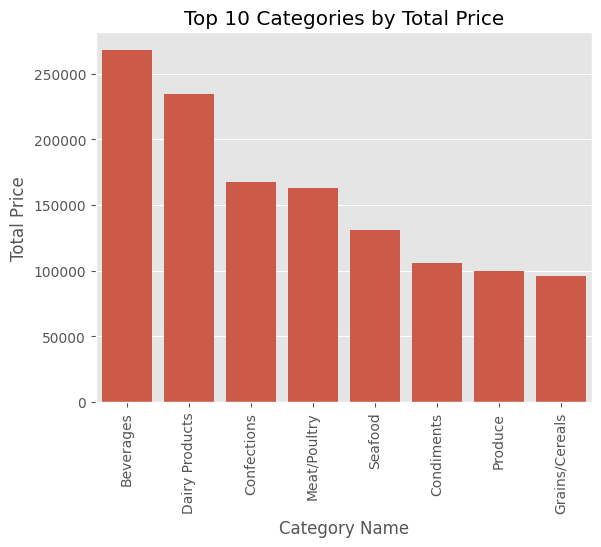

In [1103]:
sns.barplot(x = merge_df.groupby('CategoryName')['TotalPrice'].sum().sort_values(ascending = False).head(10).index , y = merge_df.groupby('CategoryName')['TotalPrice'].sum().sort_values(ascending = False).head(10).values)
plt.xticks(rotation = 90)
plt.title('Top 10 Categories by Total Price')
plt.xlabel('Category Name')
plt.ylabel('Total Price')
plt.show()

In [1104]:
fig = px.bar(x = merge_df.groupby('CategoryName')['TotalPrice'].sum().sort_values(ascending = False).head(10).index , 
             y = merge_df.groupby('CategoryName')['TotalPrice'].sum().sort_values(ascending = False).head(10).values)
fig.update_layout(
    xaxis_title='Category Name',
    yaxis_title='Total Price',
    title_text='Top 10 Categories by Total Price',
    title_x=0.5,
    title_y=0.95,
    title_font=dict(size=20),
    xaxis_tickangle=-45
)
fig.show()

In [1105]:
merge_df.groupby('CategoryName')['Quantity'].sum().sort_values(ascending = False)

CategoryName
Beverages         9532
Dairy Products    9149
Confections       7906
Seafood           7681
Condiments        5298
Grains/Cereals    4562
Meat/Poultry      4199
Produce           2990
Name: Quantity, dtype: int64

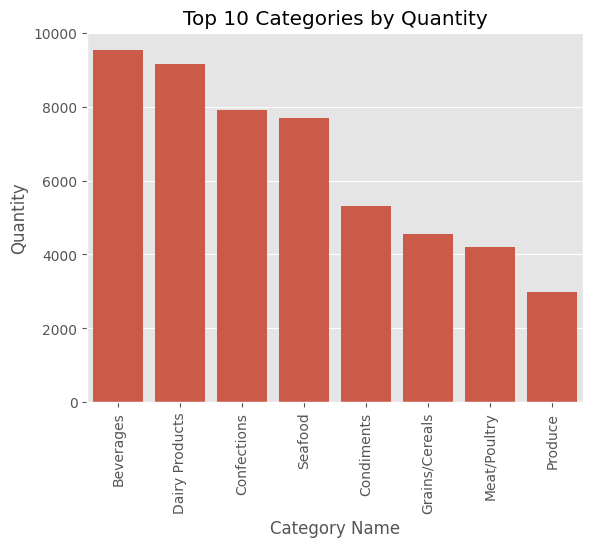

In [1106]:
sns.barplot(x = merge_df.groupby('CategoryName')['Quantity'].sum().sort_values(ascending = False).head(10).index , y = merge_df.groupby('CategoryName')['Quantity'].sum().sort_values(ascending = False).head(10).values)
plt.xticks(rotation = 90)
plt.title('Top 10 Categories by Quantity')
plt.xlabel('Category Name')
plt.ylabel('Quantity')
plt.show()

In [1107]:
fig = px.bar(x = merge_df.groupby('CategoryName')['Quantity'].sum().sort_values(ascending = False).head(10).index , 
             y = merge_df.groupby('CategoryName')['Quantity'].sum().sort_values(ascending = False).head(10).values)
fig.update_layout(
    xaxis_title='Category Name',
    yaxis_title='Quantity',
    title_text='Top 10 Categories by Quantity',
    title_x=0.5,
    title_y=0.95,
    title_font=dict(size=20),
    xaxis_tickangle=-45
)
fig.show()

In [1110]:
monthly = merge_df.groupby('Month_Name')['Quantity'].sum().reset_index()
monthly

,Month_Name,Quantity
0,April,6592
1,August,3183
2,December,4882
3,February,5247
4,January,5867
5,July,3516
6,June,1635
7,March,5835
8,May,3085
9,November,3591


In [1111]:
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

monthly['Month'] = pd.Categorical(
    monthly['Month_Name'],
    categories=month_order,
    ordered=True
)

df_sorted = monthly.sort_values('Month')

# النتيجة
print(df_sorted)

   Month_Name  Quantity      Month
4     January      5867    January
3    February      5247   February
7       March      5835      March
0       April      6592      April
8         May      3085        May
6        June      1635       June
5        July      3516       July
1      August      3183     August
11  September      3467  September
10    October      4417    October
9    November      3591   November
2    December      4882   December


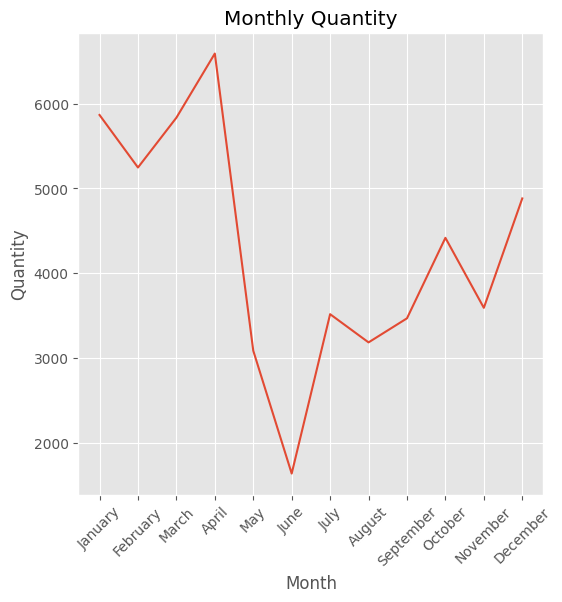

In [1119]:
plt.figure(figsize=(6, 6))
sns.lineplot(x = df_sorted['Month_Name'] , 
            y = df_sorted['Quantity'])
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.title('Monthly Quantity')
plt.xticks(rotation = 45)
plt.show()


In [1117]:
fig = px.line(x = df_sorted['Month_Name'] , y = df_sorted['Quantity'])
fig.update_layout(
    xaxis_title='Month',
    yaxis_title='Quantity',
    title_text='Monthly Quantity',
    title_x=0.5,
    title_y=0.95,
    title_font=dict(size=20),
    xaxis_tickangle=-45
)
fig.show()

In [ ]:
merge_df.groupby('Year')['Quantity'].sum()

Year
1997    25489
1998    16247
1996     9581
Name: Quantity, dtype: int64

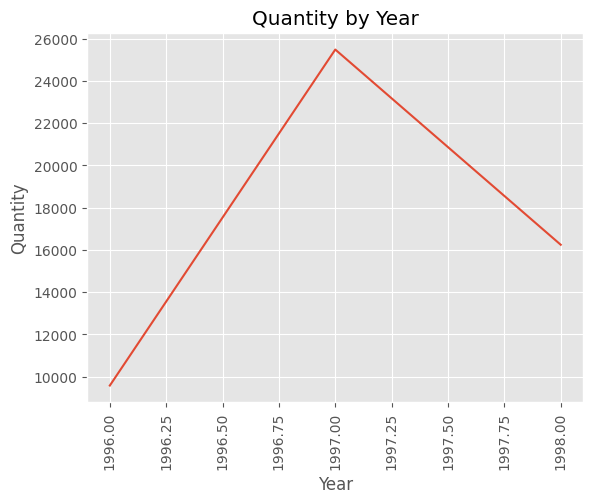

In [ ]:
plt.plot(merge_df.groupby('Year')['Quantity'].sum().index , merge_df.groupby('Year')['Quantity'].sum().values)
plt.xticks(rotation = 90)
plt.title('Quantity by Year')
plt.xlabel('Year')
plt.ylabel('Quantity')
plt.show()

In [ ]:
fig = px.line(x = merge_df.groupby('Year')['Quantity'].sum().index , y = merge_df.groupby('Year')['Quantity'].sum().values)

fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Quantity',
    title_text='Year by Quantity',
    title_x=0.5,
    title_y=0.95,
    title_font=dict(size=20),
    xaxis_tickangle=-45
)

fig.show()